<a href="https://colab.research.google.com/github/Monks-team/prediction_Algorithm/blob/master/hackathon_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTS


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import torch
from torch import nn

DATA

In [3]:
data=pd.read_csv('/content/drive/My Drive/data/pre-pro.csv')

In [4]:
data.describe()

,county,state,fips,cases,deaths,region
count,356671.000000,356671.000000,356671.000000,356671.000000,356671.000000,356671.000000
mean,917.957053,26.053739,30157.791489,591.362631,29.176647,1.352168
std,513.721169,14.394170,15321.088601,4527.553441,374.554438,1.478816
min,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,477.000000,14.000000,18105.000000,8.000000,0.000000,0.000000
50%,923.000000,25.000000,29089.000000,37.000000,1.000000,2.000000
75%,1344.000000,40.000000,45056.000000,182.000000,5.000000,2.000000
max,1828.000000,50.000000,56045.000000,227882.000000,22936.000000,4.000000


In [5]:
data.head()

,date,county,state,fips,cases,deaths,region,state_code
0,2020-01-21,1515,47,53061.0,1,0,4,WA
1,2020-01-22,1515,47,53061.0,1,0,4,WA
2,2020-01-23,1515,47,53061.0,1,0,4,WA
3,2020-01-24,389,13,17031.0,1,0,0,IL
4,2020-01-24,1515,47,53061.0,1,0,4,WA


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(356671, 8)

In [8]:
data.isnull().sum()

date          0
county        0
state         0
fips          0
cases         0
deaths        0
region        0
state_code    0
dtype: int64

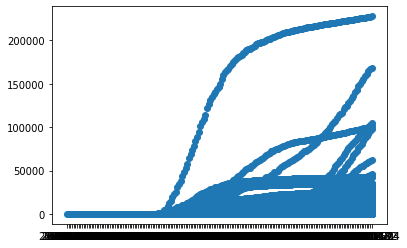

In [9]:
X=data.date
y=data.cases
X=X.to_numpy()
y=y.to_numpy()
plt.scatter(X,y)
plt.show()

In [10]:
data = data.groupby(['date'],as_index = False).agg({'cases':sum})
data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


In [11]:
data.tail()

,date,cases
181,2020-07-20,3818485
182,2020-07-21,3883886
183,2020-07-22,3952880
184,2020-07-23,4022316
185,2020-07-24,4095121


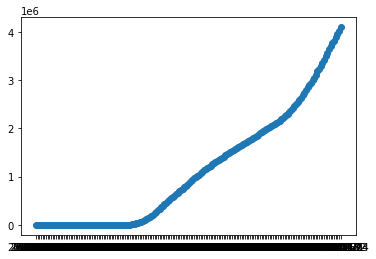

In [12]:
X=data.date
y=data.cases
X=X.to_numpy()
y=y.to_numpy()
plt.scatter(X,y)
plt.show()

In [13]:
data.head()

,date,cases
0,2020-01-21,1
1,2020-01-22,1
2,2020-01-23,1
3,2020-01-24,2
4,2020-01-25,3


In [14]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


In [15]:
data = data.drop(columns='date')

In [16]:
data.head()

,cases,day,month,year
0,1,21,1,2020
1,1,22,1,2020
2,1,23,1,2020
3,2,24,1,2020
4,3,25,1,2020


In [18]:
new_data=pd.read_csv('/content/drive/My Drive/data/pre-pro.csv')

In [19]:
new_data['date'] = pd.to_datetime(new_data['date'])
new_data['day'] = new_data['date'].dt.day
new_data['month'] = new_data['date'].dt.month
new_data['year'] = new_data['date'].dt.year
new_data.drop(columns='date')
new_data.head()

,date,county,state,fips,cases,deaths,region,state_code,day,month,year
0,2020-01-21,1515,47,53061.0,1,0,4,WA,21,1,2020
1,2020-01-22,1515,47,53061.0,1,0,4,WA,22,1,2020
2,2020-01-23,1515,47,53061.0,1,0,4,WA,23,1,2020
3,2020-01-24,389,13,17031.0,1,0,0,IL,24,1,2020
4,2020-01-24,1515,47,53061.0,1,0,4,WA,24,1,2020


In [20]:
new_data1=new_data.drop(columns=['date','state_code','state', 'county'])

In [21]:
data2=new_data1
data2.head()

,fips,cases,deaths,region,day,month,year
0,53061.0,1,0,4,21,1,2020
1,53061.0,1,0,4,22,1,2020
2,53061.0,1,0,4,23,1,2020
3,17031.0,1,0,0,24,1,2020
4,53061.0,1,0,4,24,1,2020


In [22]:
X = data.drop(['cases'], axis=1)
y = data[['cases']]
X.head()

,day,month,year
0,21,1,2020
1,22,1,2020
2,23,1,2020
3,24,1,2020
4,25,1,2020


In [23]:
y.tail()

,cases
181,3818485
182,3883886
183,3952880
184,4022316
185,4095121


In [24]:
X = X.to_numpy()
y = y.to_numpy()

In [25]:
print(X.shape,y.shape)

(186, 3) (186, 1)


In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data = sc_x.fit_transform(X)
y_data = sc_y.fit_transform(y)

In [27]:
x_data

array([[ 0.5930283 , -1.78716813,  0.        ],
       [ 0.7075696 , -1.78716813,  0.        ],
       [ 0.82211089, -1.78716813,  0.        ],
       [ 0.93665218, -1.78716813,  0.        ],
       [ 1.05119347, -1.78716813,  0.        ],
       [ 1.16573477, -1.78716813,  0.        ],
       [ 1.28027606, -1.78716813,  0.        ],
       [ 1.39481735, -1.78716813,  0.        ],
       [ 1.50935864, -1.78716813,  0.        ],
       [ 1.62389994, -1.78716813,  0.        ],
       [ 1.73844123, -1.78716813,  0.        ],
       [-1.69779754, -1.2322211 ,  0.        ],
       [-1.58325625, -1.2322211 ,  0.        ],
       [-1.46871496, -1.2322211 ,  0.        ],
       [-1.35417367, -1.2322211 ,  0.        ],
       [-1.23963237, -1.2322211 ,  0.        ],
       [-1.12509108, -1.2322211 ,  0.        ],
       [-1.01054979, -1.2322211 ,  0.        ],
       [-0.8960085 , -1.2322211 ,  0.        ],
       [-0.7814672 , -1.2322211 ,  0.        ],
       [-0.66692591, -1.2322211 ,  0.   

In [28]:
y_data

array([[-9.61999364e-01],
       [-9.61999364e-01],
       [-9.61999364e-01],
       [-9.61998516e-01],
       [-9.61997667e-01],
       [-9.61995971e-01],
       [-9.61995971e-01],
       [-9.61995971e-01],
       [-9.61995971e-01],
       [-9.61995122e-01],
       [-9.61994274e-01],
       [-9.61993426e-01],
       [-9.61990881e-01],
       [-9.61990881e-01],
       [-9.61990881e-01],
       [-9.61990032e-01],
       [-9.61990032e-01],
       [-9.61990032e-01],
       [-9.61990032e-01],
       [-9.61990032e-01],
       [-9.61989184e-01],
       [-9.61989184e-01],
       [-9.61988336e-01],
       [-9.61987487e-01],
       [-9.61987487e-01],
       [-9.61987487e-01],
       [-9.61987487e-01],
       [-9.61979004e-01],
       [-9.61979004e-01],
       [-9.61979004e-01],
       [-9.61977307e-01],
       [-9.61974762e-01],
       [-9.61974762e-01],
       [-9.61974762e-01],
       [-9.61963734e-01],
       [-9.61962037e-01],
       [-9.61949312e-01],
       [-9.61949312e-01],
       [-9.6

In [29]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim=hidden_dim

        # define an RNN with specified parameters
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)
        
        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)  
        
        # get final output 
        output = self.fc(r_out)
        
        return output, hidden

In [30]:
test_rnn = RNN(input_size=3, output_size=1, hidden_dim=10, n_layers=2)

# generate evenly spaced, test data pts

test_input = torch.Tensor(x_data).unsqueeze(0) # give it a batch_size of 1 as first dimension
print('Input size: ', test_input.size())
# test out rnn sizes
test_out, test_h = test_rnn(test_input, None)
test_out = torch.Tensor(y_data)
print('Output size: ', test_out.size())
print('Hidden state size: ', test_h.size())

Input size:  torch.Size([1, 186, 3])
Output size:  torch.Size([186, 1])
Hidden state size:  torch.Size([2, 1, 10])


In [31]:
test_h

tensor([[[ 0.7623,  0.3641,  0.4360,  0.5714,  0.2771, -0.0057, -0.5708,
           0.3068,  0.8938,  0.7318]],

        [[-0.3655,  0.7315, -0.1965,  0.6457,  0.6058, -0.4173, -0.6142,
           0.5129, -0.4242,  0.7643]]], grad_fn=<StackBackward>)

In [32]:
test_out

tensor([[-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6200e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6199e-01],
        [-9.6198e-01],
        [-9.6198e-01],
        [-9.6198e-01],
        [-9.6198e-01],
        [-9.6197e-01],
        [-9.6197e-01],
        [-9.6197e-01],
        [-9.6196e-01],
        [-9.6196e-01],
        [-9.6195e-01],
        [-9.6195e-01],
        [-9.6195e-01],
        [-9.6194e-01],
        [-9.6193e-01],
        [-9.6191e-01],
        [-9.6190e-01],
        [-9

In [33]:
# hyperparameters
input_size=3
output_size=1
hidden_dim=32
n_layers=1

# instantiate an RNN
rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

# MSE loss and Adam optimizer with a learning rate of 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

RNN(
  (rnn): RNN(3, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [34]:
# train the RNN
def train(rnn, n_steps, print_every):
    
    # initialize the hidden state
    hidden = None      
    Y=data.cases
    for batch_i, step in enumerate(range(n_steps)):
        # defining the training data 

        x = x_data[:-1]
        y = y_data[1:]
        
        # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)
        
        ## Representing Memory ##
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            #print("Predictions:",prediction)        
            print('Loss: ', loss.item())
            #plt.plot(Y,'r',linewidth=1,label='real-cases')
            #plt.plot(sc.inverse_transform(prediction.data.numpy()), 'b.',label='predicted-cases') # predictions
            plt.plot(prediction.data.numpy().flatten(), 'b.',label='predicted-cases')
            plt.show()
    
    return rnn

Loss:  0.9663447141647339


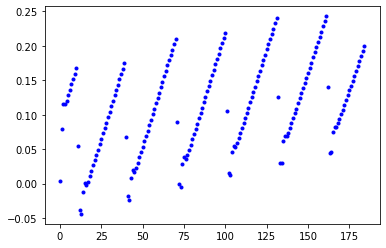

Loss:  0.07222559303045273


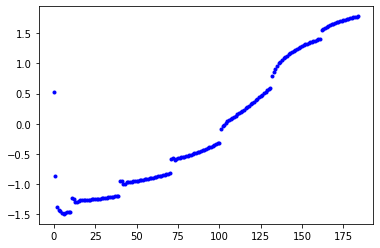

Loss:  0.030546503141522408


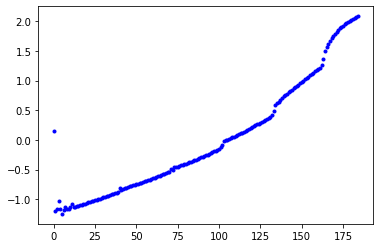

Loss:  0.024502385407686234


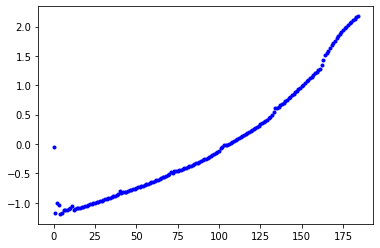

Loss:  0.019328199326992035


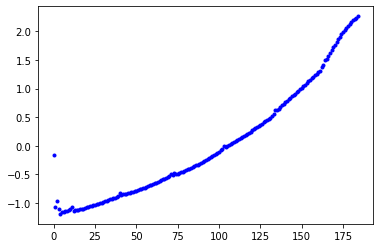

Loss:  0.015963643789291382


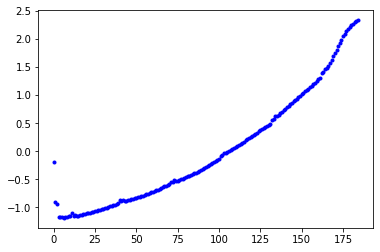

Loss:  0.01163563597947359


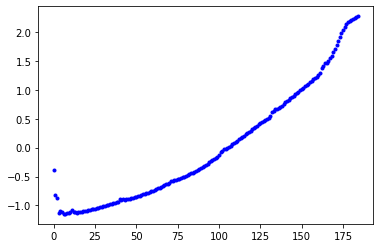

In [35]:
# train the rnn and monitor results
n_steps = 100
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)

Loss:  0.007310906425118446


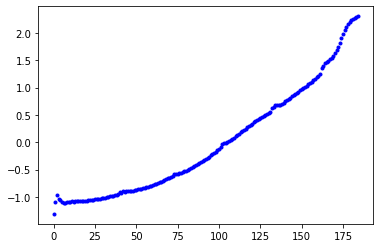

Loss:  0.007644195109605789


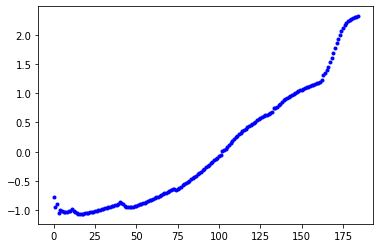

Loss:  0.001839546370320022


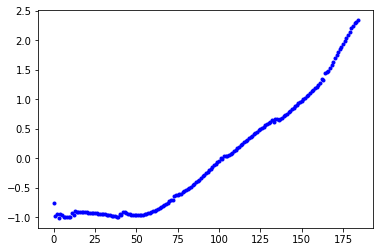

Loss:  0.000828628777526319


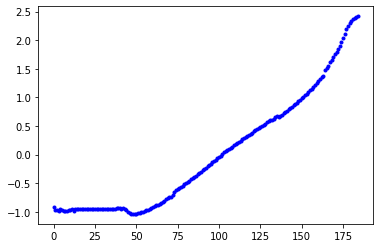

Loss:  0.0003526217769831419


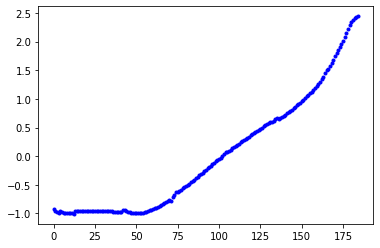

Loss:  0.000983312027528882


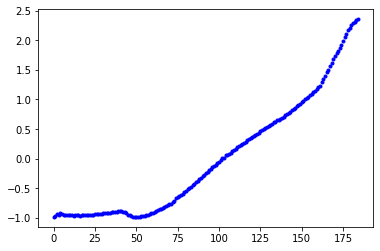

Loss:  0.0002439133240841329


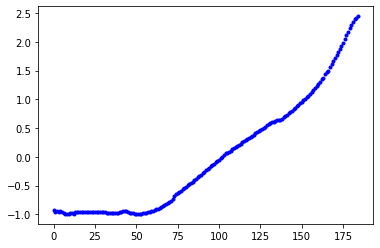

In [36]:
n_steps = 100
print_every = 15

trained_rnn1 = train(rnn, n_steps, print_every)